In [55]:
import pandas as pd
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_csv('data/new_train.csv')
data.head()

,tweet_id,tweet,sentiment,tweet_len_noisy
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


In [21]:
data.shape

(7273, 4)

In [22]:
def identify_urls(tweet):
    """
    This is a function that will search for URLs withing a string. It returns the URL part if there is any or it will
    return 'No URL'
    """
    
    regex = r'('

    # Scheme (HTTP, HTTPS, FTP and SFTP):
    regex += r'(?:(https?|s?ftp):\/\/)?'

    # www:
    regex += r'(?:www\.)?'

    regex += r'('

    # Host and domain (including ccSLD):
    regex += r'(?:(?:[A-Z0-9][A-Z0-9-]{0,61}[A-Z0-9]\.)+)'

    # TLD:
    regex += r'([A-Z]{2,6})'

    # IP Address:
    regex += r'|(?:\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'

    regex += r')'

    # Port:
    regex += r'(?::(\d{1,5}))?'

    # Query path:
    regex += r'(?:(\/\S+)*)'

    regex += r')'
    
    #searching for URLs in the tweet
    find_urls_in_string = re.compile(regex, re.IGNORECASE)
    url = find_urls_in_string.search(tweet)
    
    if url is not None and url.group(0) is not None:
        return url.group(0).strip()
    else:
        return "No URL"

In [47]:
data['URL'] = data['tweet'].apply(lambda x: identify_urls(x))

In [48]:
data['URL'].value_counts()

No URL                                                                                         7142
bit.ly/g03MZB                                                                                     8
webdoc.com                                                                                        8
actsofsharing.com                                                                                 5
rww.to/f6BCEt                                                                                     5
www.rana.co                                                                                       2
studentsforcleanwater.org/rsvp                                                                    2
Lightbox.com                                                                                      2
biyt.ly                                                                                           2
www.pep.jobs/upc                                                                                  2


### We have extracted the URLs from the tweets. There are some wrong values still present in our new column which can be removed separately. We can say that ATLEAST 7142(98%) tweets for sure did not had any URLs.

In [49]:
url_data = data[data['URL'] != 'No URL']

In [50]:
url_data.head()

,tweet_id,tweet,sentiment,tweet_len_noisy,URL
10,6398,RT Official #SXSW App Û÷SXSW GOÛª bit.ly/hm...,3,81,bit.ly/hmiiGa
146,7302,Setting up for the Google #gsdm #sxsw party. ...,2,127,sxsurrogates.com
215,4236,4 Most Valuable Apple iPad Apps; Top Critical ...,1,104,uber.la
218,7102,Apple is opening up a temporary store in downt...,1,117,Statesman.com
244,74,Ha.ha. RT #SXSW News: Yahoo.com is loosing se...,1,134,Ha.ha


In [51]:
#cleaning the URLs data separately to find insights

url_data['URL_tokenized'] = url_data['URL'].apply(lambda x: x.lower().split('.'))

C:\Users\Sufyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
url_data.head(10)

,tweet_id,tweet,sentiment,tweet_len_noisy,URL,URL_tokenized
10,6398,RT Official #SXSW App Û÷SXSW GOÛª bit.ly/hm...,3,81,bit.ly/hmiiGa,"[bit, ly/hmiiga]"
146,7302,Setting up for the Google #gsdm #sxsw party. ...,2,127,sxsurrogates.com,"[sxsurrogates, com]"
215,4236,4 Most Valuable Apple iPad Apps; Top Critical ...,1,104,uber.la,"[uber, la]"
218,7102,Apple is opening up a temporary store in downt...,1,117,Statesman.com,"[statesman, com]"
244,74,Ha.ha. RT #SXSW News: Yahoo.com is loosing se...,1,134,Ha.ha,"[ha, ha]"
260,6952,RT Win free iPad 2 from webdoc.com #sxsw RT,1,52,webdoc.com,"[webdoc, com]"
320,3855,"is biyt.ly for email, like google voice for e...",3,84,biyt.ly,"[biyt, ly]"
388,7020,6th and Congress. Dude is creatively saving up...,2,105,Www.socialmediabum.tumblr.com,"[www, socialmediabum, tumblr, com]"
453,1127,For those that can't wait. 6th and Congress ge...,1,132,tcrn.ch/eB5fjs,"[tcrn, ch/eb5fjs]"
468,1549,Google to Launch Major New Social Network C...,1,103,rww.to/f6BCEt,"[rww, to/f6bcet]"


In [59]:
words_to_remove = ["www", "com", "http", "https", "ly", "org"]

url_data['URL_tokenized'] = url_data['URL_tokenized'].apply(lambda x: [w for w in x if w not in words_to_remove])

In [60]:
url_data.head(10)

,tweet_id,tweet,sentiment,tweet_len_noisy,URL,URL_tokenized
10,6398,RT Official #SXSW App Û÷SXSW GOÛª bit.ly/hm...,3,81,bit.ly/hmiiGa,"[bit, ly/hmiiga]"
146,7302,Setting up for the Google #gsdm #sxsw party. ...,2,127,sxsurrogates.com,[sxsurrogates]
215,4236,4 Most Valuable Apple iPad Apps; Top Critical ...,1,104,uber.la,"[uber, la]"
218,7102,Apple is opening up a temporary store in downt...,1,117,Statesman.com,[statesman]
244,74,Ha.ha. RT #SXSW News: Yahoo.com is loosing se...,1,134,Ha.ha,"[ha, ha]"
260,6952,RT Win free iPad 2 from webdoc.com #sxsw RT,1,52,webdoc.com,[webdoc]
320,3855,"is biyt.ly for email, like google voice for e...",3,84,biyt.ly,[biyt]
388,7020,6th and Congress. Dude is creatively saving up...,2,105,Www.socialmediabum.tumblr.com,"[socialmediabum, tumblr]"
453,1127,For those that can't wait. 6th and Congress ge...,1,132,tcrn.ch/eB5fjs,"[tcrn, ch/eb5fjs]"
468,1549,Google to Launch Major New Social Network C...,1,103,rww.to/f6BCEt,"[rww, to/f6bcet]"


In [61]:
def generate_wordcloud(dataframe, col_name, title):
    
    wordcloud = WordCloud().generate(dataframe[col_name].to_string())

    # Display the generated image:
    plt.figure(figsize=(15,8))
    plt.title(title)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

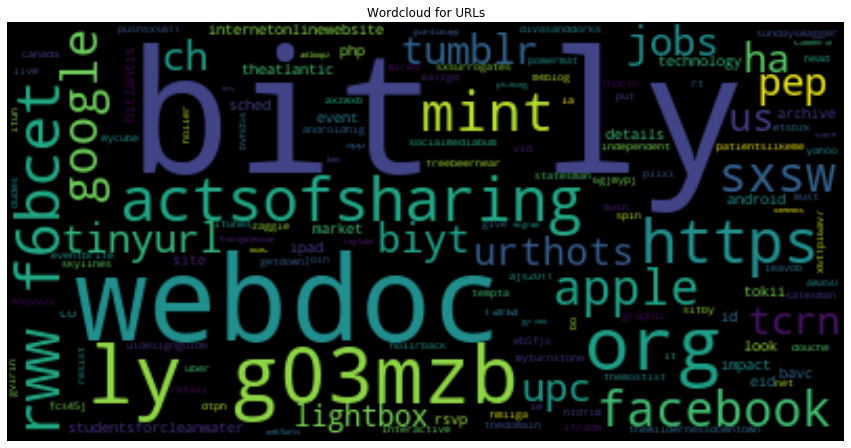

In [63]:
generate_wordcloud(url_data, 'URL_tokenized', 'Wordcloud for URLs')